**Prevendo a intenção de compras de usuários de e-comerce SVM**

In [ ]:
from platform import python_version
print("A versão do python usada nesse projeto é:", python_version())

A versão do python usada nesse projeto é: 3.7.12


**Definição do problema**


Avaliar quais atributos influenciam um usuário na compra de produtos online, construindo um modelo preditivo com o intúito de prever compras futuras.


**Dataset utilizado**: https://archive.ics.uci.edu/ml/datasets/Online+shoppers+Purchasing+intention+Dataset

***Importando Pacotes***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

**Carregando Dataset**

In [ ]:
df_arquivo = pd.read_csv("online_shoppers_intention.csv")
df_arquivo.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Análise exploratória dos dados**

In [ ]:
df_arquivo.shape

(12330, 18)

In [ ]:
df_arquivo.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
print(df_arquivo.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [ ]:
df_arquivo.dropna(inplace = True)

In [ ]:
print(df_arquivo.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
df_arquivo.shape

(12316, 18)

In [ ]:
df_arquivo.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
arquivo_copia = df_arquivo.copy()

In [ ]:
continuous = []
categorical = []

In [ ]:
for c in arquivo_copia.columns[:-1]:
  if arquivo_copia.nunique()[c] >= 30:
    continuous.append(c)
  else:
    categorical.append(c)

In [ ]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [ ]:
arquivo_copia[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [ ]:
arquivo_copia[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


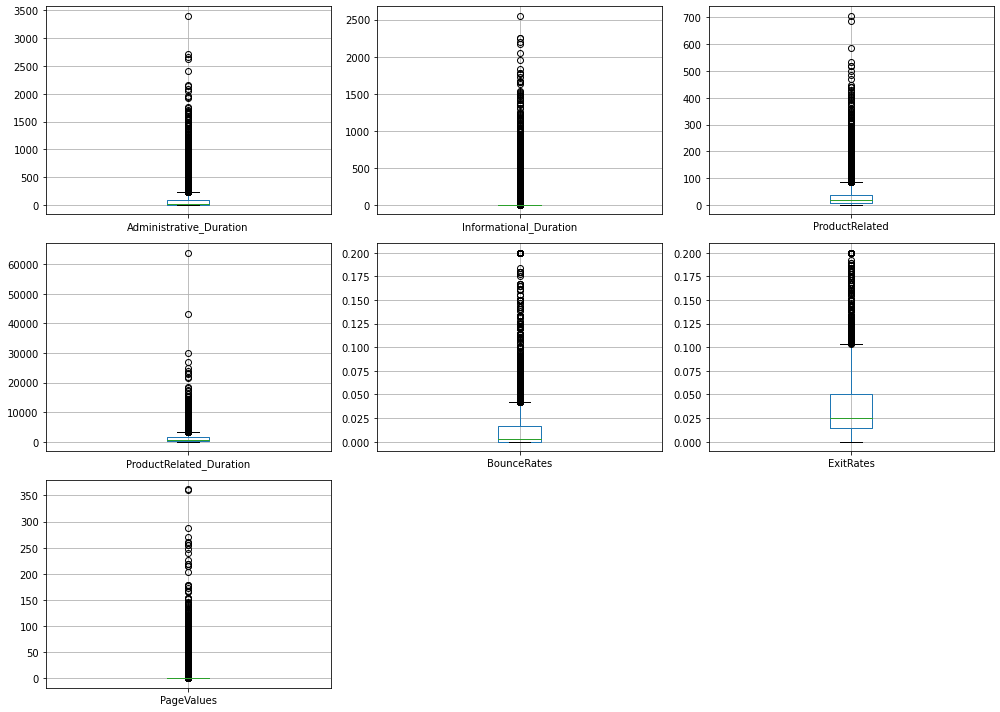

In [ ]:
grafico_num = plt.figure(figsize= (14, 10))

for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1);
  arquivo_copia.boxplot(col);
  plt.tight_layout()
plt.savefig('boxplot.png')

In [ ]:
arquivo_copia[continuous] = np.log1p(1 + arquivo_copia[continuous])

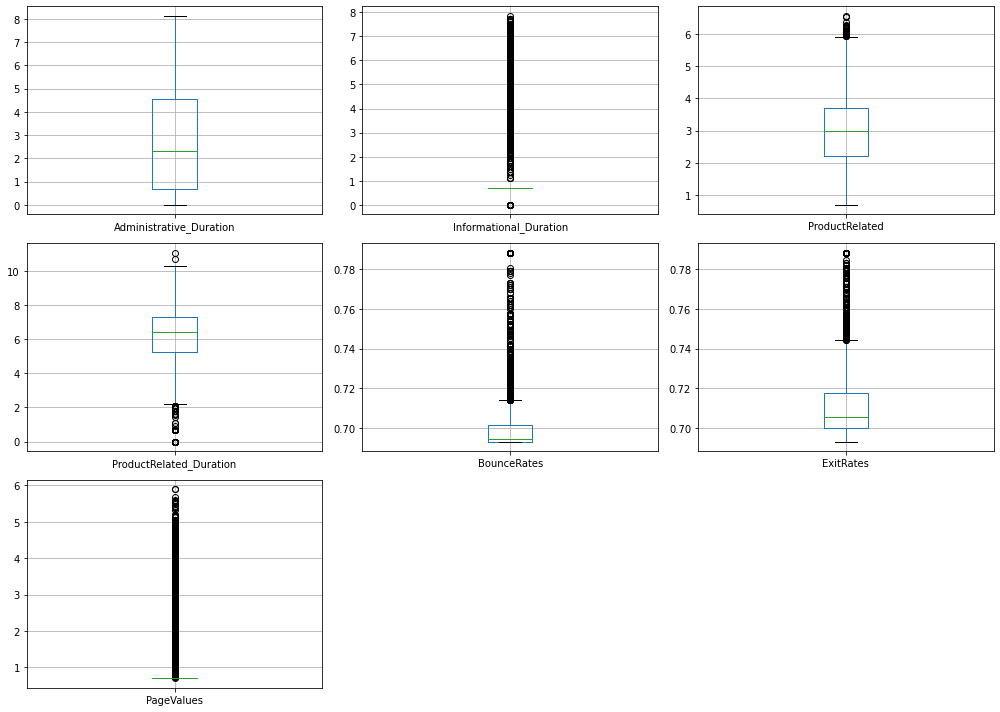

In [ ]:
fig = plt.figure(figsize = (14, 10))
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1);
  arquivo_copia.boxplot(col)
  plt.tight_layout()
plt.savefig('boxplot2')

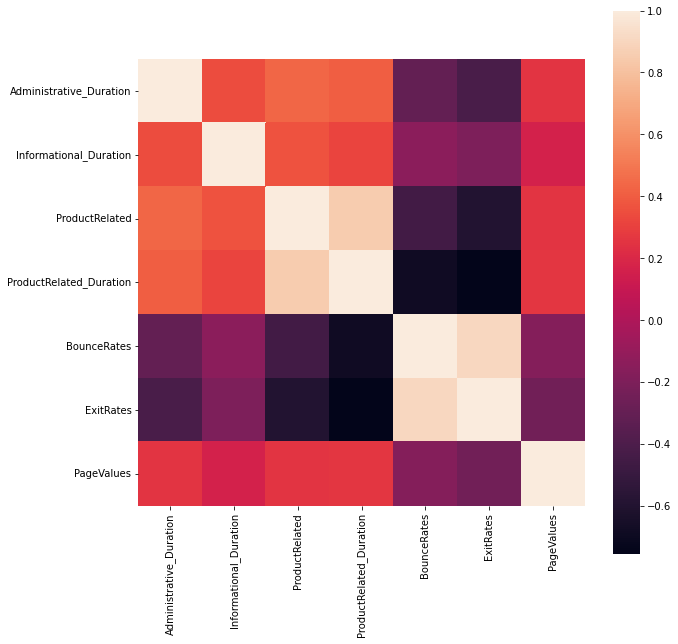

In [ ]:
plt.figure(figsize = (10, 10))

sns.heatmap(arquivo_copia[['Administrative_Duration',
                           'Informational_Duration',
                           'ProductRelated',
                           'ProductRelated_Duration',
                           'BounceRates',
                           'ExitRates',
                           'PageValues']].corr(),vmax = 1., square = True)

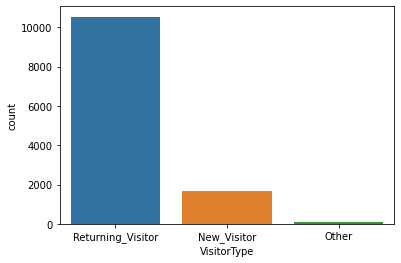

In [ ]:
plt.xlabel("Tipo de visitante")
sns.countplot(arquivo_copia["VisitorType"])

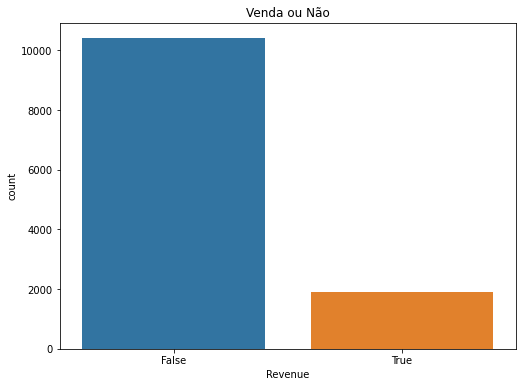

In [ ]:
plt.rcParams["figure.figsize"] = (18, 6)
plt.subplot(1, 2, 2)
plt.title("Venda ou Não")
sns.countplot(arquivo_copia["Revenue"])

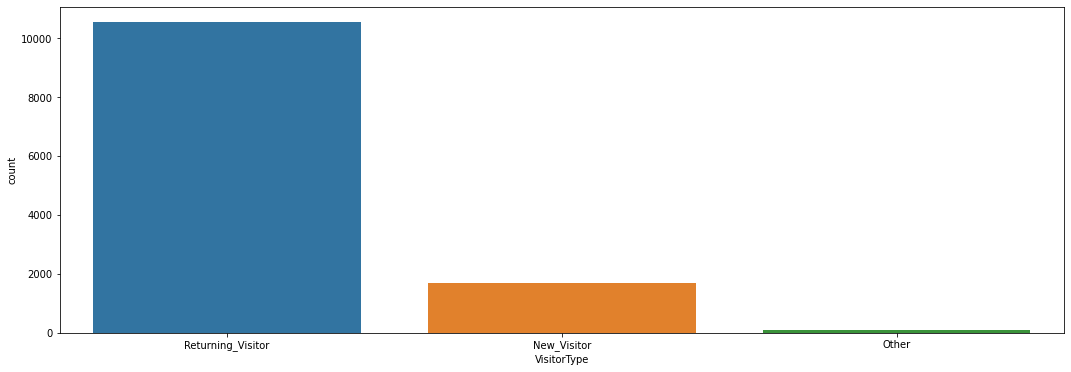

In [ ]:
plt.xlabel("tipo de visitante")
sns.countplot(arquivo_copia["VisitorType"])

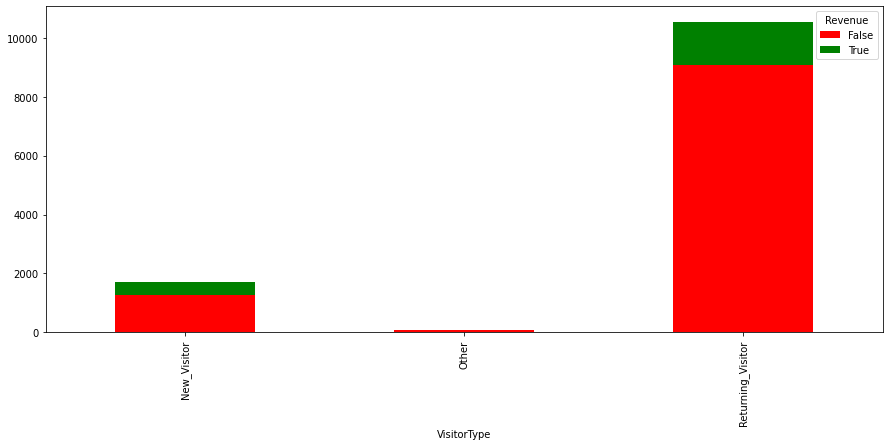

In [ ]:
pd.crosstab(arquivo_copia["VisitorType"], arquivo_copia["Revenue"]).plot(kind = 'bar',
                                                                         stacked = True,
                                                                         figsize = (15, 6),
                                                                         color = ["red", "green"])

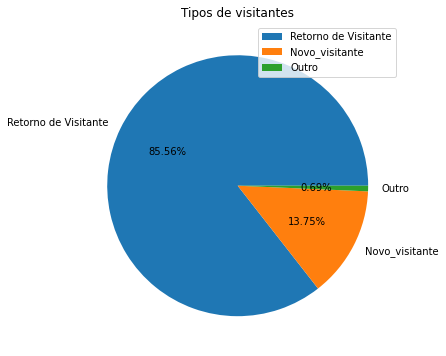

In [ ]:
labels = ["Retorno de Visitante", "Novo_visitante", "Outro"]
plt.title("Tipos de visitantes")
plt.pie(arquivo_copia["VisitorType"].value_counts(), labels = labels, autopct = "%.2f%%")
plt.legend()

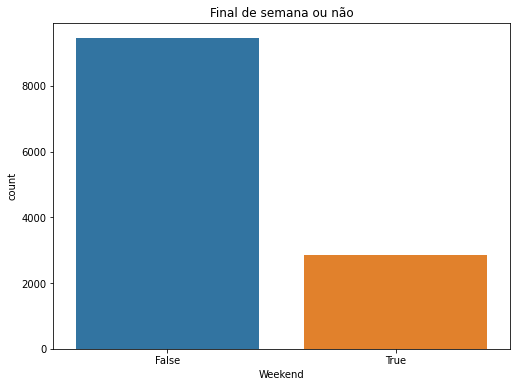

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Final de semana ou não")
sns.countplot(arquivo_copia["Weekend"])

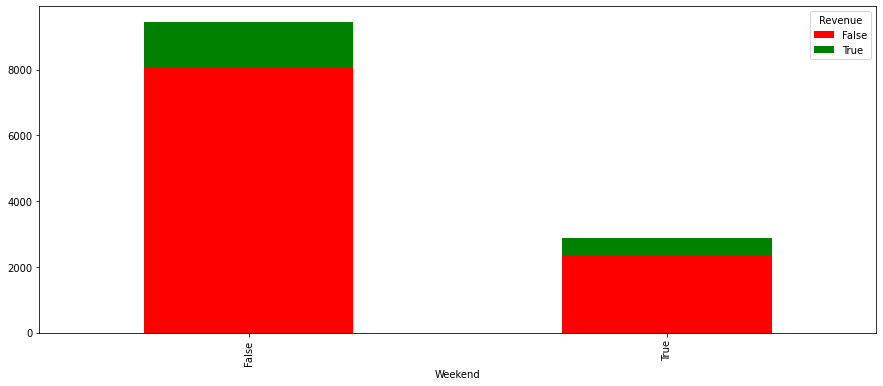

In [ ]:
pd.crosstab(arquivo_copia["Weekend"], arquivo_copia["Revenue"]).plot(kind = "bar",
                                                                     stacked = True,
                                                                     figsize = (15, 6),
                                                                     color = ("red", "green"))

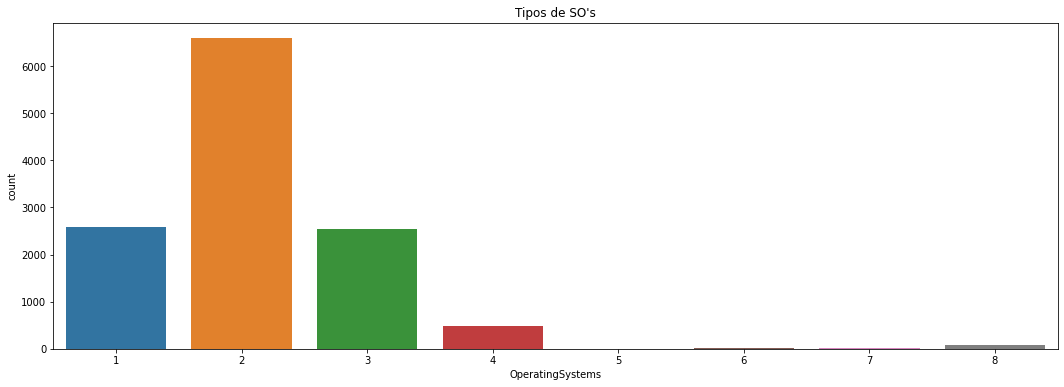

In [ ]:
plt.title("Tipos de SO's")
plt.xlabel("SO utilizado")
sns.countplot(arquivo_copia["OperatingSystems"])

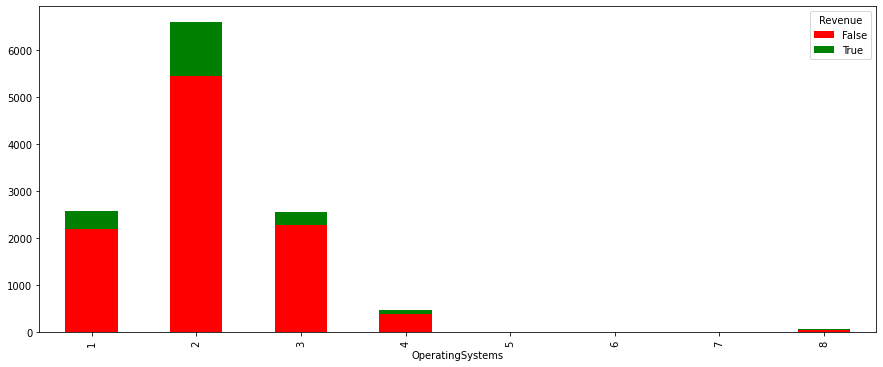

In [ ]:
pd.crosstab(arquivo_copia["OperatingSystems"], arquivo_copia["Revenue"]).plot(kind = "bar",
                                                                              stacked = True,
                                                                              figsize = (15, 6),
                                                                              color = ("red", "green"))

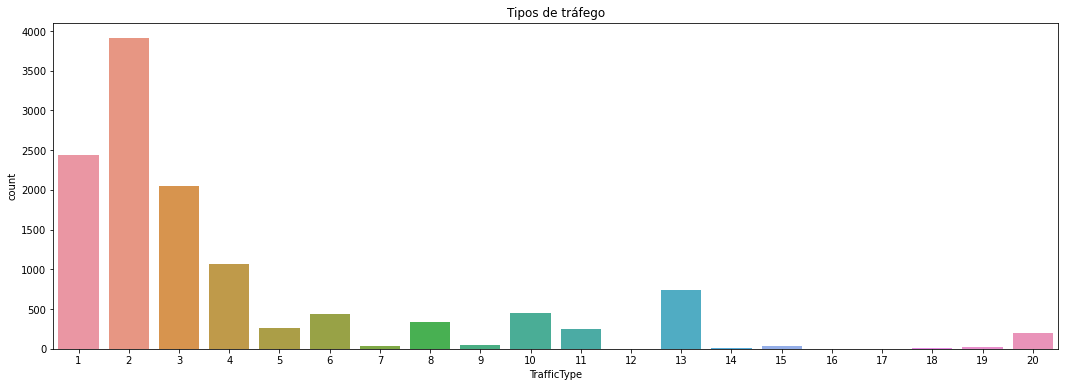

In [ ]:
plt.title("Tipos de tráfego")
plt.xlabel("Tipo de tráfego")
sns.countplot(arquivo_copia["TrafficType"])

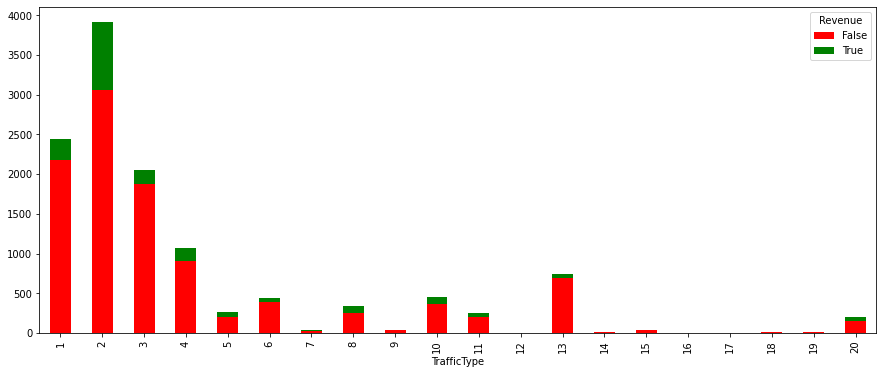

In [ ]:
pd.crosstab(arquivo_copia["TrafficType"], arquivo_copia["Revenue"]).plot(kind = "bar",
                                                                    stacked = True,
                                                                    figsize = (15, 6),
                                                                    color = ("red", "green"))

**Pré Processamento dos dados**

In [ ]:
df_arquivo.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
lb = LabelEncoder()

df_arquivo["Month"] = lb.fit_transform(df_arquivo["Month"])
df_arquivo["VisitorType"] = lb.fit_transform(df_arquivo["VisitorType"])

In [ ]:
df_arquivo.dropna(inplace = True)

In [ ]:
df_arquivo.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [ ]:
df_arquivo.shape

(12316, 18)

In [ ]:
target_count = df_arquivo.Revenue.value_counts()
target_count

False    10408
True      1908
Name: Revenue, dtype: int64

<function matplotlib.pyplot.show>

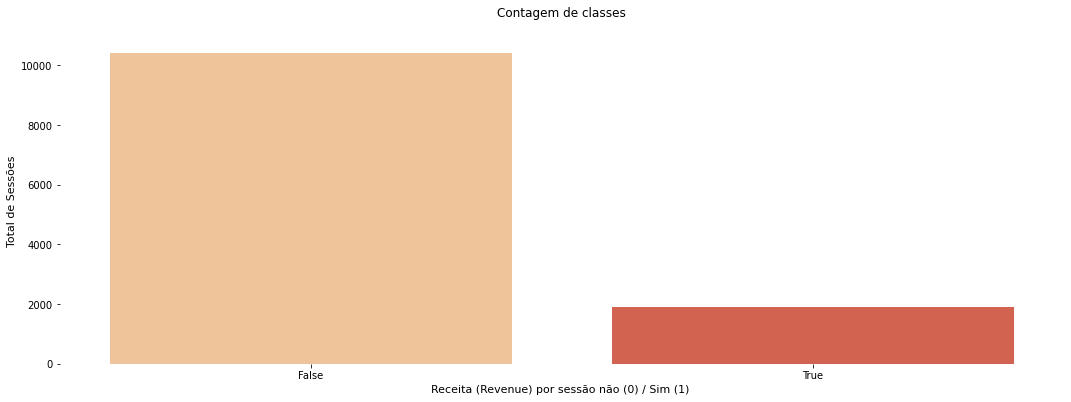

In [ ]:
sns.countplot(df_arquivo.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel("Receita (Revenue) por sessão não (0) / Sim (1) ", fontsize = 11)
plt.ylabel("Total de Sessões", fontsize = 11)
plt.title("Contagem de classes\n")
plt.show

In [ ]:
!pip install -q imblearn
import imblearn

In [ ]:
df_arquivo.shape

(12316, 18)

In [ ]:
df_arquivo.iloc[:, 0:17].head

<bound method NDFrame.head of        Administrative  Administrative_Duration  ...  VisitorType  Weekend
0                 0.0                      0.0  ...            2    False
1                 0.0                      0.0  ...            2    False
2                 0.0                     -1.0  ...            2    False
3                 0.0                      0.0  ...            2    False
4                 0.0                      0.0  ...            2     True
...               ...                      ...  ...          ...      ...
12325             3.0                    145.0  ...            2     True
12326             0.0                      0.0  ...            2     True
12327             0.0                      0.0  ...            2     True
12328             4.0                     75.0  ...            2    False
12329             0.0                      0.0  ...            0     True

[12316 rows x 17 columns]>

In [ ]:
df_arquivo.iloc[:,17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
seed = 100

In [ ]:
x = df_arquivo.iloc[:, 0:17]
y = df_arquivo.iloc[:, 17]

smote_bal = SMOTE(random_state = seed)

X_res, Y_res = smote_bal.fit_resample(x, y)

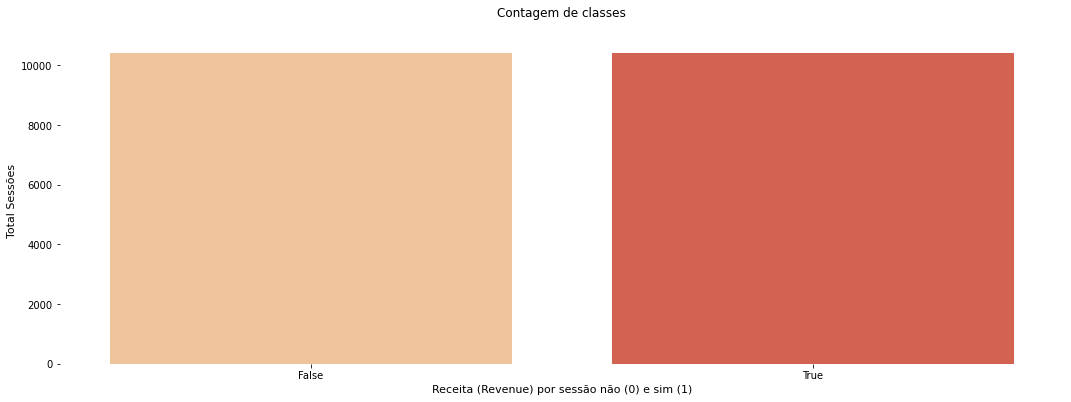

In [ ]:
sns.countplot(Y_res, palette = "OrRd")
plt.box(False)
plt.xlabel("Receita (Revenue) por sessão não (0) e sim (1)", fontsize = 11)
plt.ylabel("Total Sessões", fontsize = 11)
plt.title("Contagem de classes\n")
plt.show()

In [ ]:
print(X_res.shape)
print(Y_res.shape)
x = X_res
y = Y_res

(20816, 17)
(20816,)


In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42)

***Criando modelo SVM***

In [ ]:
from sklearn.preprocessing import StandardScaler
X_treino_scaled = StandardScaler().fit_transform(X_treino)
X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [ ]:
modelo_v1 = svm.SVC(kernel = 'linear')

In [ ]:
import time
start = time.time()
modelo_v1.fit(X_treino_scaled, Y_treino)
end = time.time()
print("Tempo de treinamento do modelo: ", end - start)

Tempo de treinamento do modelo:  10.058667659759521


In [ ]:
previsoes_v1 = modelo_v1.predict(X_teste_scaled)

In [ ]:
SVM_dict_v1 = {"Modelo":"SVM",
               "Versão":"01",
               "Kernel":"Linear com dados padronizados",
               "precision": recall_score(previsoes_v1, Y_teste),
               "F1 Score": f1_score(previsoes_v1, Y_teste),
               "Accuracy": accuracy_score(previsoes_v1, Y_teste),
               "AUC": roc_auc_score(Y_teste, previsoes_v1)}

In [ ]:
print(SVM_dict_v1)

{'Modelo': 'SVM', 'Versão': '01', 'Kernel': 'Linear com dados padronizados', 'precision': 0.891280947255113, 'F1 Score': 0.8359414437152951, 'Accuracy': 0.8438751000800641, 'AUC': 0.8444911232916505}


***Realizando previsões com novos dados***

In [ ]:
novo_dados = np.array([4.0, 0.0, 1.2, 2, 2.0, 1.5, 2.6, 0.5, 3.4, 6, 1.7, 4.3, 4.2, 1.8, 7.6, 2.0, False]).reshape(1,-1)

In [ ]:
novo_dados_scaled = StandardScaler().fit_transform(novo_dados)


In [ ]:
previsao_novo_dados = modelo_v1.predict(novo_dados_scaled)

In [ ]:
previsao_novo_dados

array([ True])